### Basic Statistics Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import scipy.stats as stats

#### Business Problem 1

In [2]:
loan = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\4. Basic Statistics - Hypothesis Testing\LoansData.csv")

In [3]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
# changing col names

loan.columns = loan.columns.str.replace('.','_')

C:\Users\kavir\AppData\Local\Temp\ipykernel_37964\1457157749.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan.columns = loan.columns.str.replace('.','_')


In [5]:
loan.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [7]:
loan.shape

(2500, 14)

In [9]:
# checking null values

loan.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [10]:
# dropping null values and employment_length column

loan = loan.dropna()
loan = loan.drop (columns = 'Employment_Length')

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2413 non-null   float64
 1   Amount_Funded_By_Investors      2413 non-null   float64
 2   Interest_Rate                   2413 non-null   object 
 3   Loan_Length                     2413 non-null   object 
 4   Loan_Purpose                    2413 non-null   object 
 5   Debt_To_Income_Ratio            2413 non-null   object 
 6   State                           2413 non-null   object 
 7   Home_Ownership                  2413 non-null   object 
 8   Monthly_Income                  2413 non-null   float64
 9   FICO_Range                      2413 non-null   object 
 10  Open_CREDIT_Lines               2413 non-null   float64
 11  Revolving_CREDIT_Balance        2413 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [19]:
# changing data type of interest rate and debt income ratio col.

In [18]:
loan['Debt_To_Income_Ratio'] = pd.to_numeric(loan['Debt_To_Income_Ratio'].str.replace('%',''))

In [ ]:
loan['Interest_Rate'] = pd.to_numeric(loan['Interest_Rate'].str.replace('%',''))

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2413 non-null   float64
 1   Amount_Funded_By_Investors      2413 non-null   float64
 2   Interest_Rate                   2413 non-null   float64
 3   Loan_Length                     2413 non-null   object 
 4   Loan_Purpose                    2413 non-null   object 
 5   Debt_To_Income_Ratio            2413 non-null   float64
 6   State                           2413 non-null   object 
 7   Home_Ownership                  2413 non-null   object 
 8   Monthly_Income                  2413 non-null   float64
 9   FICO_Range                      2413 non-null   object 
 10  Open_CREDIT_Lines               2413 non-null   float64
 11  Revolving_CREDIT_Balance        2413 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [21]:
loan.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0


In [25]:
# calculating avg Fico score based on Range

loan['FICO_Range'] = ((loan.FICO_Range.str[0:3].astype(int))+(loan.FICO_Range.str[4:].astype(int)))/2

##### a. Interest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

i. Null Hypothesis HO: Interest rate is same for different loan amounts

ii. Alternate Hypothesis Ha: Interest rates are different for different loan amounts

iii. CI = 95%
     p value = 0.05

iv. Test: Pearsonr (co-relation)

In [26]:
stats.pearsonr(loan['Interest_Rate'], loan['Amount_Funded_By_Investors'])

PearsonRResult(statistic=0.3315955311036452, pvalue=5.064256950483673e-63)

v. Acceptance/Rejection: p value in the output < assumed p value i.e 0.05, hence rejecting the Null Hypothesis

vi. Conclusion: Interest rate is different for different loan amounts

##### b. Loan length is directly effecting interest rate.

i. Null Hypothesis HO: Loan length does not affect interest rate

ii. Alternate Hypothesis Ha: Loan length is directly affecting interest rate

iii. CI = 95%
     p value = 0.05

iv. Test: t-test

In [27]:
loan.Loan_Length.value_counts()

36 months    1876
60 months     537
Name: Loan_Length, dtype: int64

In [28]:
# creating groups for diff loan lenghths

In [29]:
short_loan = loan.loc[loan['Loan_Length'] == '36 months', 'Interest_Rate']

long_loan = loan.loc[loan['Loan_Length'] == '60 months', 'Interest_Rate']

In [31]:
stats.ttest_ind(short_loan, long_loan)

Ttest_indResult(statistic=-23.05779328482699, pvalue=1.79380106734165e-106)

v. Acceptance/Rejection: p value in the output < assumed p value i.e 0.05, hence rejecting the Null Hypothesis

vi. Conclusion: Loan length is directly affecting the interest rate

##### c.  Interest rate varies for different purpose of loans

In [34]:
loan.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,737.0,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,717.0,12.0,11140.0,1.0


In [33]:
loan['Loan_Purpose'].value_counts()

debt_consolidation    1262
credit_card            430
other                  189
home_improvement       147
major_purchase         100
small_business          83
car                     50
wedding                 37
moving                  29
medical                 28
vacation                20
house                   20
educational             14
renewable_energy         4
Name: Loan_Purpose, dtype: int64

i. Null Hypothesis HO: Interest rate does not vary for different loan purposes

ii. Alternate Hypothesis Ha: Interest rate varies for different loan purposes

iii. CI = 95%
     p value = 0.05

iv. Test: spearsman rank

In [35]:
stats.spearmanr(loan['Loan_Purpose'],loan['Interest_Rate'])

SignificanceResult(statistic=-0.05369361470239015, pvalue=0.008337443233367109)

v. Acceptance/Rejection: p value in the output < assumed p value i.e 0.05, hence rejecting the Null Hypothesis

vi. Conclusion: Interest rate varies for different loan purposes

##### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

i. Null Hypothesis HO: No relationship between FICO scores and Home Ownership.

ii. Alternate Hypothesis Ha: There is a relationship between FICO scores and Home Ownership

iii. CI = 95%
     p value = 0.05

iv. Test: F- test, ANOVA

In [37]:
loan.Home_Ownership.value_counts()

RENT        1110
MORTGAGE    1109
OWN          189
OTHER          5
Name: Home_Ownership, dtype: int64

In [39]:
rent = loan.loc[loan['Home_Ownership'] == 'RENT', 'FICO_Range']
mortgage = loan.loc[loan['Home_Ownership'] == 'MORTGAGE', 'FICO_Range']
own =  loan.loc[loan['Home_Ownership'] == 'OWN', 'FICO_Range']
other = loan.loc[loan['Home_Ownership'] == 'OTHER', 'FICO_Range']

In [40]:
stats.f_oneway(rent, mortgage, own, other)

F_onewayResult(statistic=20.65464665222211, pvalue=3.2682005447315283e-13)

v. Acceptance/Rejection: p value in the output < assumed p value i.e 0.05, hence rejecting the Null Hypothesis

vi. Conclusion: There is a relationship between FICO scores and Home Ownership that is, people owning home may have high FICO score

#### Business Problem 2

In [41]:
price_quote = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [42]:
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


##### a. if there is any difference in the average price quotes provided by Mary and Barry.

i. Null Hypothesis HO: No difference between the average price quotes provided by Mary and Barry

ii. Alternate Hypothesis Ha: There is a difference between the avg price quotes provided by Mary and Barry

iii. CI = 95%
     p value = 0.05

iv. Test: t-test

In [43]:
stats.ttest_ind(price_quote['Barry_Price'], price_quote['Mary_Price'])

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

v. Acceptance/Rejection: p value in the output > assumed p value i.e 0.05, hence accepting the Null Hypothesis

vi. Conclusion: There is No difference between the average price quotes provided by Mary and Barry

#### Business Problem 3

In [44]:
Treatment = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

In [45]:
Treatment.head(2)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


##### a. To determine if the reengineering effort changed the critical incidence rate. (VAR5)

i. Null Hypothesis HO: There was no change in the CI rate after reengineering

ii. Alternate Hypothesis Ha: There was a change in CI rate after reengineering

iii. CI = 95%
     p value = 0.05

iv. Test: t-test

In [47]:
CI_pre = Treatment.loc[Treatment['Reengineer'] == 'Prior', 'VAR5']
CI_post = Treatment.loc[Treatment['Reengineer'] == 'Post', 'VAR5']

In [48]:
stats.ttest_ind(CI_pre, CI_post)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

v. Acceptance/Rejection: p value in the output > assumed p value i.e 0.05, hence accepting the Null Hypothesis

vi. Conclusion: There is No change in the CI rate even after reengineering

##### b. if the reengineering effort had effect on the staff turnover

i. Null Hypothesis HO: There was no effect on the staff turnover after reengineering effort

ii. Alternate Hypothesis Ha: There was an effect on the staff turnover after reengineering effort

iii. CI = 95%
     p value = 0.05

iv. Test: t-test

In [50]:
staff_pre = Treatment.loc[Treatment['Reengineer'] == 'Prior', 'Employee_Turnover']
staff_post = Treatment.loc[Treatment['Reengineer'] == 'Post', 'Employee_Turnover']

In [51]:
stats.ttest_ind(staff_pre, staff_post)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

v. Acceptance/Rejection: p value in the output > assumed p value i.e 0.05, hence accepting the Null Hypothesis

vi. Conclusion: There was no effect on the staff turnover after reengineering

#### Business Problem 4

In [54]:
data = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")

In [55]:
data. head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


##### a. Check, If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs,and medium priority jobs should be completed more quickly than low priority jobs

i. Null Hypothesis HO: Tasks not getting completed on priority.

ii. Alternate Hypothesis Ha: Tasks getting completed on priority, High priority then medium then low

iii. CI = 95%
     p value = 0.05

iv. Test: t-test

In [56]:
high = data.loc[data['Priority'] == 'High', 'Days']
medium = data.loc[data['Priority'] == 'Medium', 'Days']
low = data.loc[data['Priority'] == 'Low', 'Days']

In [57]:
stats.f_oneway(high,medium, low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

v. Acceptance/Rejection: p value in the output > assumed p value i.e 0.05, hence accepting the Null Hypothesis

vi. Conclusion: The tasks are not getting completed as per priority, high > medium > low

#### Business Problem 5

In [58]:
Films = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\4. Basic Statistics - Hypothesis Testing\Films.csv")

In [60]:
Films.head(3)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5


In [61]:
# checking for null values

Films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [62]:
for i in Films.columns:
    Films[i]=Films[i].fillna(Films[i].mode()[0])  

In [63]:
Films.isnull().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [64]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [65]:
Films.Gender=np.where((Films.Gender == 'Male') | (Films.Gender == '1'),"Male","Female")

In [67]:
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [68]:
Films.Marital_Status.value_counts()

2          210
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [69]:
Films.Marital_Status=np.where((Films.Marital_Status=='1') | (Films.Marital_Status=='Married') ,"Married","Single" )

In [70]:
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

###### a. What is the overall level of customer satisfaction?

In [65]:
mean=Films.Overall.mean()

In [66]:
std=Films.Overall.std()

In [67]:
SE=std/(np.sqrt(Films.shape[0]))

In [68]:
print(f'with 95% confidence levels,the overall level of customer satisfaction will be in the range ({mean-(1.96*SE)},{mean+(1.96*SE)})')

with 95% confidence levels,the overall level of customer satisfaction will be in the range (1.5469994901816926,1.6954247522425496)


##### b. What factors are linked to satisfaction?

In [72]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [73]:
# factor 1 = Movie

In [74]:
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [75]:
Willy_Wonka=Films.query('Movie=="Willy Wonka"').Overall
Ferris_Buellers_Day_Off=Films.query('Movie=="Ferris Buellers Day Off"').Overall
Old_School=Films.query('Movie=="Old School"').Overall

In [76]:
stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

In [77]:
# factor 2 = Gender

In [78]:
Male=Films.query('Gender=="Male"').Overall
Female=Films.query('Gender=="Female"').Overall

In [79]:
stats.ttest_ind(Male,Female)

Ttest_indResult(statistic=1.393621669674226, pvalue=0.16437541932112798)

In [80]:
# factor 3 = Marital_Status

In [81]:
Married=Films.query('Marital_Status=="Married"').Overall
Single=Films.query('Marital_Status=="Single"').Overall

In [82]:
stats.ttest_ind(Single,Married)

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

In [83]:
# factor 4 = Sinage

In [84]:
Films.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [85]:
stats.pearsonr(Films.Sinage,Films.Overall)

PearsonRResult(statistic=0.38210280422395665, pvalue=6.501065434766499e-13)

In [86]:
# factor 5 = Parking

In [87]:
stats.pearsonr(Films.Parking,Films.Overall)

PearsonRResult(statistic=0.5144289487855273, pvalue=1.0840276087789278e-23)

In [88]:
# factor 6 = Clean

In [89]:
stats.pearsonr(Films.Clean,Films.Overall)

PearsonRResult(statistic=0.3508222789070923, pvalue=5.437550007439627e-11)

In [90]:
# factor 7 = Age

In [91]:
Films.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [92]:
one=Films.query('Age==1').Overall
two=Films.query('Age==2').Overall
three=Films.query('Age==3').Overall
four=Films.query('Age==4').Overall

In [93]:
one.mean()

1.5384615384615385

In [94]:
two.mean()

1.6779661016949152

In [95]:
three.mean()

1.547008547008547

In [96]:
four.mean()

1.7

In [97]:
stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

In [98]:
# factor 8= Income

In [99]:
Films.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [100]:
income1=Films.query('Income==1').Overall
income2=Films.query('Income==2').Overall
income3=Films.query('Income==3').Overall


In [101]:
stats.f_oneway(income1,income2,income3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

In [102]:
# factor 9 = Hear_About

In [103]:
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [104]:
Hear_About_5=Films.query('Hear_About=="5"').Overall
Hear_About_4=Films.query('Hear_About=="4"').Overall
Hear_About_3=Films.query('Hear_About=="3"').Overall
Hear_About_2=Films.query('Hear_About=="2"').Overall
Hear_About_1=Films.query('Hear_About=="1"').Overall
Hear_About_2_5=Films.query('Hear_About=="2,5"').Overall
Hear_About_3_4=Films.query('Hear_About=="3,4"').Overall
Hear_About_4_5=Films.query('Hear_About=="4,5"').Overall
Hear_About_1_5=Films.query('Hear_About=="1,5"').Overall
Hear_About_5_4=Films.query('Hear_About=="5,4"').Overall
Hear_About_3_5=Films.query('Hear_About=="3,5"').Overall

In [105]:
stats.f_oneway(Hear_About_5,Hear_About_4,Hear_About_3,Hear_About_2,Hear_About_1,Hear_About_2_5,Hear_About_3_4,Hear_About_4_5,Hear_About_1_5,Hear_About_5_4,Hear_About_3_5)

F_onewayResult(statistic=1.457397539085138, pvalue=0.15433478299883888)

#### therefore, sinage,parking and clean are factors linked to satisfaction

##### c. What is the demographic profile of Film on the Rocks patrons?

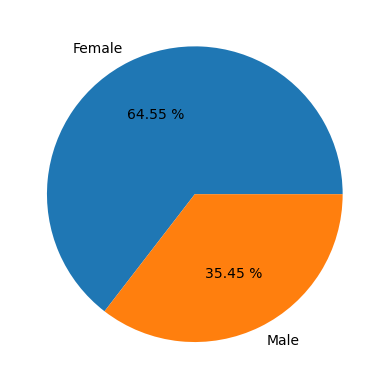

In [106]:
a=(((Films.Gender.value_counts())/(Films.shape[0])*100)).reset_index().set_index('index')
plt.pie(a.Gender,labels=a.index,autopct='%0.2f %%')
plt.show()


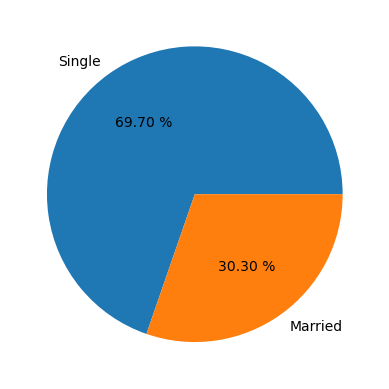

In [107]:
b=(((Films.Marital_Status.value_counts())/(Films.shape[0])*100)).reset_index().set_index('index')
plt.pie(b.Marital_Status,labels=b.index,autopct='%0.2f %%')
plt.show()

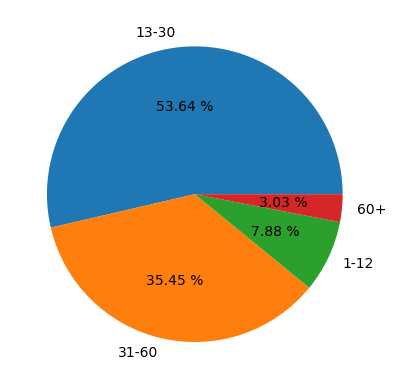

In [108]:
c=(((Films.Age.value_counts())/(Films.shape[0])*100)).reset_index().set_index('index')
plt.pie(c.Age,labels=['13-30','31-60','1-12','60+'],autopct='%0.2f %%')
plt.show()

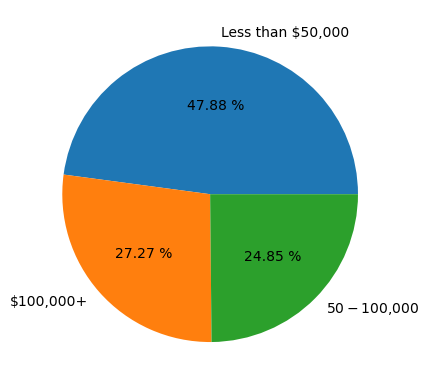

In [109]:
d=(((Films.Income.value_counts())/(Films.shape[0])*100)).reset_index().set_index('index')
plt.pie(d.Income,labels=['Less than $50,000','$100,000+','$50-$100,000'],autopct='%0.2f %%')
plt.show()

##### d. In what media outlet(s) should the film series be advertised?

In [110]:
Films.Hear_About.value_counts().reset_index().iloc[0,0]

'5'

#### 5 means 'word of mouth'.the film series that should be advertised by 'word of mouth'